# Stat Log

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Dados

In [2]:
# Caminho dos dados
datapath_test_statlog = '/home/luis/data/uci/Statlog/sat.tst'
datapath_train_statlog = '/home/luis/data/uci/Statlog/sat.trn'

In [3]:
train_data = pd.read_csv(datapath_train_statlog, delimiter=" ", header=None)
test_data = pd.read_csv(datapath_test_statlog, delimiter=" ", header=None)

### Leitura

In [4]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In [5]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,...,92,66,87,108,89,63,83,104,85,1
1996,64,79,100,85,56,71,96,85,56,68,...,85,66,83,100,85,63,83,100,81,1
1997,56,68,91,81,56,64,91,81,53,64,...,81,59,87,96,81,63,83,92,74,5
1998,56,68,87,74,60,71,91,81,60,64,...,74,59,83,92,74,59,83,92,70,5


In [6]:
train_data.shape, test_data.shape

((4435, 37), (2000, 37))

In [7]:
train_size = train_data.shape[0]/(train_data.shape[0] + test_data.shape[0])
print(f'Tamanho da partição de treino: {round(train_size, 2)}')

Tamanho da partição de treino: 0.69


---

# OPF Supervisionado

In [8]:
# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF

# Para não ficar mostrando um monte de logs
import logging
logging.disable()

## Particionando o dataset

In [9]:
X_train = np.array(train_data.iloc[:,:-1])
X_test = np.array(test_data.iloc[:,:-1])

In [10]:
Y_train = train_data.iloc[:,-1]
Y_test = test_data.iloc[:,-1]

In [11]:
np.unique(Y_train), np.unique(Y_test)

(array([1, 2, 3, 4, 5, 7]), array([1, 2, 3, 4, 5, 7]))

## Classificando

In [12]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train.values)

# Predição no conjunto de testes
preds = opf.predict(X_test)

### Confrontando os resultados

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import opfython.math.general as g

In [14]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       461
           2       0.96      0.95      0.95       224
           3       0.87      0.87      0.87       397
           4       0.65      0.68      0.66       211
           5       0.90      0.89      0.89       237
           7       0.88      0.87      0.87       470

    accuracy                           0.89      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



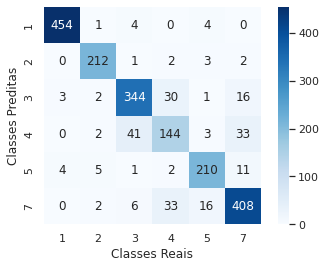

In [16]:
y_mat = Y_test
mat = confusion_matrix(y_mat, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_mat),
            yticklabels=np.unique(preds),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

In [18]:
# Teste de acurácia
acc = g.opf_accuracy(Y_test, preds)

print(f'Accuracy: {round(acc, 2)}')

Accuracy: 0.94


---

# OPF não supervisionado

In [19]:
import opfython.stream.parser as p
from opfython.models import UnsupervisedOPF

Métrics de distância:  
['additive_symmetric', 'average_euclidean', 'bhattacharyya', 'bray_curtis',
'canberra', 'chebyshev', 'chi_squared', 'chord', 'clark', 'cosine', 'dice',
'divergence', 'euclidean', 'gaussian', 'gower', 'hamming', 'hassanat', 'hellinger',
'jaccard', 'jeffreys', 'jensen', 'jensen_shannon', 'k_divergence', 'kulczynski',
'kullback_leibler', 'log_euclidean', 'log_squared_euclidean', 'lorentzian',
'manhattan', 'matusita', 'max_symmetric', 'mean_censored_euclidean', 'min_symmetric',
'neyman', 'non_intersection', 'pearson', 'sangvi', 'soergel', 'squared', 'squared_chord',
'squared_euclidean', 'statistic', 'topsoe', 'vicis_symmetric1', 'vicis_symmetric2',
'vicis_symmetric3', 'vicis_wave_hedges']

In [94]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(min_k=10, max_k=60)

In [95]:
type(X_train), type(Y_train)

(numpy.ndarray, pandas.core.series.Series)

In [96]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [97]:
type(X_train[0][0]), type(Y_train[0])

(numpy.float64, numpy.int64)

In [98]:
# Ajusta o modelo aos dados
opf.fit(X_train, Y_train.values)

In [99]:
# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele
#   conquistadas
opf.propagate_labels()

In [100]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X_test)

print('Número de agrupamentos = ',len(np.unique(clusters)))

Número de agrupamentos =  16


In [101]:
np.unique(preds)

array([1, 2, 3, 4, 5, 7])

## Confrontando os resultados

In [102]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.99      0.87      0.93       224
           3       0.92      0.73      0.81       397
           4       0.41      0.79      0.54       211
           5       0.93      0.62      0.74       237
           7       0.79      0.75      0.77       470

    accuracy                           0.80      2000
   macro avg       0.83      0.79      0.79      2000
weighted avg       0.85      0.80      0.81      2000



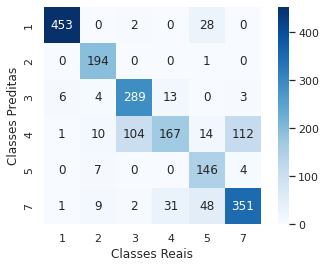

In [103]:
y_mat = Y_test
mat = confusion_matrix(y_mat, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(y_mat),
            yticklabels=np.unique(preds),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

In [104]:
# Teste de acurácia
acc = g.opf_accuracy(Y_test, preds)

print(f'Accuracy: {round(acc, 2)}')

Accuracy: 0.91


/home/luis/anaconda3/lib/python3.8/site-packages/opfython/math/general.py:97: RuntimeWarning: invalid value encountered in true_divide
  errors[:, 1] /= counts


---